In [7]:
import os
import sys
import importlib    
import numpy as np
    
#Paths
housing_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/datasets/housing.csv"
python_scripts_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/python-scripts"

#Path initialization so that Python can see where our script lies.
script_dir = os.path.abspath(python_scripts_path) 
sys.path.append(script_dir)

#Imports
from sklearn.model_selection import StratifiedShuffleSplit

from test_set_check import test_set_check

from split_train_test_by_id import split_train_test_by_id
from load_housing_data import load_housing_data


Stratified sampling:
- You're researching, for example, 10000 housings (families with houses).
- Each has attributes like [median_income, median_household_price,...)
- You select 1 attribute (e.g. median_income) + divide into multiple median_income categories, using this function
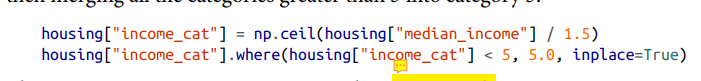
- And the result:
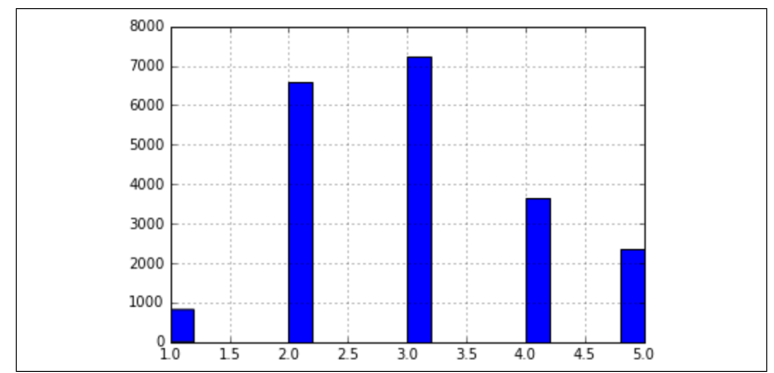

=> You have 5 median_income categories.

- Next, you take those 10000 housings and feed it to the StatifiedShuffleSplit to split 10000 housings into 5 groups (strata)

In [5]:
housing = load_housing_data(housing_path)
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [9]:
#limits number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) 
#merge "larger than 5" categories into category 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=False) 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

income_cat
3.0     0.350533
2.0     0.318798
4.0     0.176357
5.0     0.069041
1.0     0.039729
6.0     0.025678
7.0     0.009205
8.0     0.005087
11.0    0.002422
9.0     0.002422
10.0    0.000727
Name: count, dtype: float64


In [10]:
corr_matrix = housing.corr()

ValueError: could not convert string to float: 'NEAR BAY'